In [1]:
#@Imports
import sys
import os
path = os.path.abspath('..')
if path not in sys.path:
  sys.path.insert(0, path)

%load_ext autoreload

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output
from retry import retry

from language_models.ollama_logits import OllamaLanguageModel

from components.components import compute_desire_for_gamble, multiple_choice_preferences, compute_distribution_of_desire_for_gamble, compute_distribution_of_desire_for_gamble_binaries

/Users/socialai/opt/anaconda3/envs/concordia-eric/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
system_message = ("This is an agent based model. "
  f"The goal of the LLM to to play characters in a game, and act as humanlike as possible. "
  "Ideally, human observers should not be able to tell the difference between the LLM and a human player. "
)

model = OllamaLanguageModel(
"llama3:70b", system_message=system_message, streaming=False
)

In [4]:
import random
import matplotlib.pyplot as plt
from scipy.special import softmax
from IPython.display import clear_output

gvs = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
bvs = [-10, -20, -30, -40, -50, -60, -70, -80, -90, -100]
# gvs = [10, 20]
# bvs = [-10, -20]
P_w = [50]

RESULTS = {
  "GV": [],
  "BV": [],
  "PW": [],
  "EV": [],
  "softmax": []
}

for gv in gvs:
  for bv in bvs:
    for pw in P_w:
      values = {
        "very bad": [],
        "somewhat bad": [],
        "slightly bad": [],
        "slightly good": [],
        "somewhat good": [],
        "very good": []
      }

      for i in range(6):
        _options = ['very bad', 'somewhat bad', 'slightly bad', 'slightly good', 'somewhat good', 'very good']
        options = [
          _options,
          _options[1:] + [_options[0]],
          _options[2:] + _options[0:2],
          _options[3:] + _options[0:3],
          _options[4:] + _options[0:4],
          _options[5:] + _options[0:5]
        ][i]

        for j in range(6):

          clear_output(wait = True)

          print(f"Option being evaluated: {options[j]}. GV: {gv}, BV: {bv}, P_w: {pw}. {i}, {j}")

          request = (
                "You are very logical and rational when doing this task. "
                "You are presented with a gamble. It has a probability of winning, a value for winning, and a value for losing. "
                "If you win, you get the win value, if you lose, you get loss value. "
                f"The probability of winning is {pw}%, the value of winning is {gv}, and the value of losing is {bv}. "
                f"Think about how good or bad the gamble is, and provide your affective feeling about how good or bad you feel about it.\n"
                f"The options for responding are: {options}.\n"
                f"Thinking about your options, and how good the gamble is, would you answer '{options[j]}' to how you feel about this gamble?\n"
                "Answer with a single word of either 'yes', 'no', without any explanations."
          )

          query = ['yes', 'no']

          # print(request)
          output, logits = model.sample_text(request, logits=True, query_tokens=query)
          # print(output)
          # print(logits)
          prob_yes = logits['yes'] / (logits['yes'] + logits['no'])
          # print(prob_yes)

          values[options[j]].append(prob_yes)

      output = [np.mean(v) for k, v in values.items()]

      print(softmax(output))

      RESULTS["BV"].append(bv)
      RESULTS["GV"].append(gv)
      RESULTS["PW"].append(pw)
      RESULTS["softmax"].append(softmax(output))
      RESULTS["EV"].append((pw/100) * gv + (1-(pw/100)) * bv)
      # plt.bar(values.keys(), softmax(output))
      # plt.show()


Option being evaluated: somewhat good. GV: 100, BV: -100, P_w: 50. 5, 5
[0.07996752 0.21019609 0.2079724  0.21118027 0.21163732 0.0790464 ]


In [5]:
for i in range(5):
    print(f"For gv={RESULTS['GV'][i]} and bv={RESULTS['BV'][i]}, the ev is {RESULTS['EV'][i]} and the distribution is {RESULTS['softmax'][i]}.")


For gv=10 and bv=-10, the ev is 0.0 and the distribution is [0.07846092 0.20860613 0.20991045 0.21228409 0.21222566 0.07851275].
For gv=10 and bv=-20, the ev is -5.0 and the distribution is [0.1192163  0.2102411  0.20935054 0.1941652  0.18950497 0.0775219 ].
For gv=10 and bv=-30, the ev is -10.0 and the distribution is [0.17019124 0.21608141 0.2150194  0.16825385 0.15080626 0.07964784].
For gv=10 and bv=-40, the ev is -15.0 and the distribution is [0.19227287 0.21908875 0.21754034 0.15329337 0.1370076  0.08079707].
For gv=10 and bv=-50, the ev is -20.0 and the distribution is [0.22250027 0.2323712  0.23098818 0.12130136 0.10711838 0.08572062].


In [6]:
import pandas as pd
df = pd.DataFrame(RESULTS)
df.to_csv('single_gamble_new.csv', index=False)

SPLIT_RESULTS = {
  "GV": RESULTS['GV'],
  "BV": RESULTS['BV'],
  "PW": RESULTS['PW'],
  "EV": RESULTS['EV'],
  "VeryBad": RESULTS['softmax']
}

[0.10217598, 0.10965553, 0.12727532, 0.27630284, 0.27731587, 0.10727447]
Took 10 steps.
Took 10 steps.
Took 6 steps.
Took 18 steps.
Took 16 steps.
Took 7 steps.
Took 6 steps.
Took 10 steps.
Took 11 steps.
Took 12 steps.
Took 52 steps.
Took 39 steps.
Took 5 steps.
Took 51 steps.
Took 22 steps.
Took 21 steps.
Took 16 steps.
Took 15 steps.
Took 21 steps.
Took 11 steps.
Took 8 steps.
Took 8 steps.
Took 13 steps.
Took 12 steps.
Took 25 steps.
Took 22 steps.
Took 19 steps.
Took 6 steps.
Took 29 steps.
Took 7 steps.
Took 11 steps.
Took 24 steps.
Took 15 steps.
Took 57 steps.
Took 5 steps.
Took 22 steps.
Took 19 steps.
Took 15 steps.
Took 11 steps.
Took 8 steps.
Took 5 steps.
Took 20 steps.
Took 7 steps.
Took 17 steps.
Took 12 steps.
Took 30 steps.
Took 10 steps.
Took 37 steps.
Took 7 steps.
Took 22 steps.
Took 11 steps.
Took 5 steps.
Took 6 steps.
Took 21 steps.
Took 34 steps.
Took 27 steps.
Took 27 steps.
Took 9 steps.
Took 22 steps.
Took 15 steps.
Took 12 steps.
Took 20 steps.
Took 12 steps

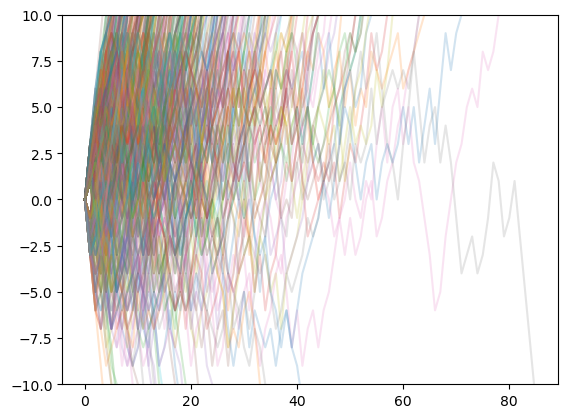

In [3]:
import numpy as np

min_threshold = -10
max_threshold = 10
# dist = RESULTS["softmax"][0]
# dist = [0.10217598, 0.10965553, 0.12727532, 0.27630284, 0.27731587, 0.10727447]
print(dist)
scores = [-3, -2, -1, 1, 2, 3]
values_trials = []

rts = []
response = []

for trial in range(500):
    values = [0]
    timesteps = 0

    while values[-1] > min_threshold and values[-1] < max_threshold:
        timesteps += 1

        choice = np.random.choice(scores, p=dist)
        values.append(values[-1] + choice)
        
    print(f"Took {timesteps} steps.")
    plt.plot(values, alpha=0.2)
    plt.ylim(min_threshold, max_threshold)

    rts.append(timesteps)
    if values[-1] < min_threshold:
        response.append(-1)
    else:
        response.append(+1)



plt.show()

In [4]:
print(rts)
print(response)
import pandas as pd
dataset = pd.DataFrame({
    'rt': rts,
    'response': response
})

print(dataset)

[10, 10, 6, 18, 16, 7, 6, 10, 11, 12, 52, 39, 5, 51, 22, 21, 16, 15, 21, 11, 8, 8, 13, 12, 25, 22, 19, 6, 29, 7, 11, 24, 15, 57, 5, 22, 19, 15, 11, 8, 5, 20, 7, 17, 12, 30, 10, 37, 7, 22, 11, 5, 6, 21, 34, 27, 27, 9, 22, 15, 12, 20, 12, 13, 10, 18, 29, 31, 13, 13, 24, 18, 14, 12, 8, 21, 15, 9, 58, 18, 8, 5, 10, 8, 48, 7, 5, 34, 6, 6, 5, 49, 15, 17, 25, 25, 27, 17, 5, 6, 19, 4, 14, 27, 12, 43, 20, 8, 8, 13, 8, 17, 18, 19, 25, 9, 7, 20, 43, 11, 18, 9, 21, 9, 11, 31, 30, 12, 9, 8, 18, 10, 8, 22, 30, 26, 26, 13, 21, 7, 8, 15, 34, 8, 10, 28, 27, 12, 8, 5, 19, 9, 53, 28, 20, 17, 28, 13, 7, 14, 24, 11, 15, 18, 29, 51, 27, 6, 35, 12, 5, 19, 12, 13, 17, 8, 11, 5, 10, 7, 15, 8, 13, 9, 28, 35, 12, 5, 6, 9, 16, 26, 17, 21, 4, 13, 7, 29, 8, 21, 34, 39, 12, 10, 7, 12, 63, 13, 14, 37, 19, 15, 8, 9, 8, 25, 30, 7, 24, 13, 18, 7, 15, 22, 21, 10, 19, 14, 40, 28, 18, 10, 21, 14, 23, 18, 10, 21, 8, 5, 35, 11, 7, 10, 12, 12, 5, 23, 39, 31, 11, 17, 16, 20, 19, 44, 33, 40, 23, 12, 26, 5, 8, 13, 7, 39, 11, 8, 

In [8]:
import hssm

simple_ddm_model = hssm.HSSM(data=dataset)
simple_ddm_model

Hierarchical Sequential Sampling Model
Model: ddm

Response variable: rt,response
Likelihood: analytical
Observations: 500

Parameters:

v:
    Prior: Normal(mu: 0.0, sigma: 2.0)
    Explicit bounds: (-inf, inf)
a:
    Prior: HalfNormal(sigma: 2.0)
    Explicit bounds: (0.0, inf)
z:
    Prior: Uniform(lower: 0.0, upper: 1.0)
    Explicit bounds: (0.0, 1.0)
t:
    Prior: HalfNormal(sigma: 2.0, initval: 0.1)
    Explicit bounds: (0.0, inf)

Lapse probability: 0.05
Lapse distribution: Uniform(lower: 0.0, upper: 10.0)

<<!! BUG IN FGRAPH.REPLACE OR A LISTENER !!>> <class 'TypeError'> Cannot convert Type Matrix(float32, shape=(2, ?)) (of Variable Switch.0) into Type Matrix(float64, shape=(2, ?)). You can try to manually convert Switch.0 into a Matrix(float64, shape=(2, ?)). local_mul_switch_sink
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: local_mul_switch_sink
ERROR (pytensor.graph.rewriting.basic): node: Mul(Eq.0, Switch.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/Users/socialai/opt/anaconda3/envs/concordia-eric/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/Users/socialai/opt/anaconda3/envs/concordia-eric/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
 

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.


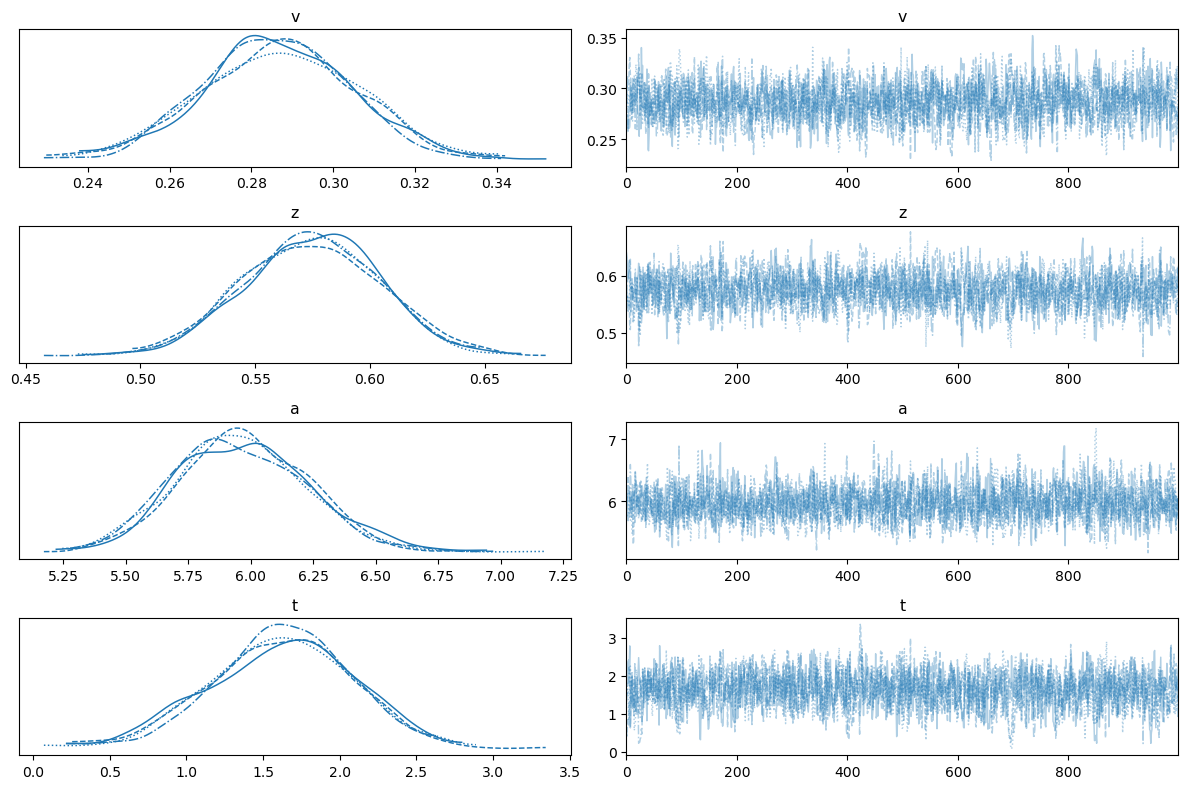

In [9]:
simple_ddm_model.sample()
simple_ddm_model.summary()
simple_ddm_model.plot_trace()

<Axes: title={'center': 'Posterior Predictive Distribution'}, xlabel='Response Time', ylabel='Density'>

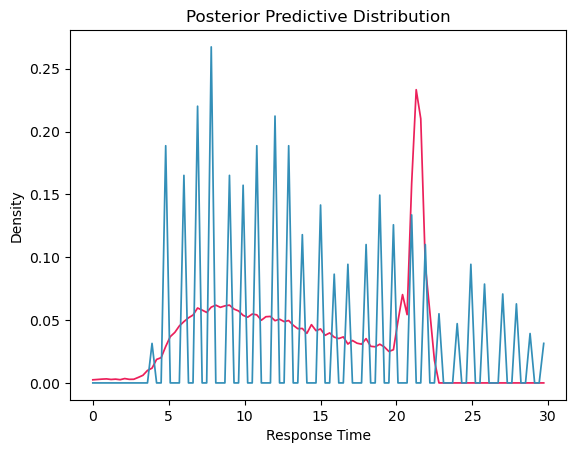

In [16]:
hssm.plotting.plot_posterior_predictive(simple_ddm_model, range=(0, 30))

In [19]:
import random
jitter_amount = 0.5
jittered_rts = [x + random.uniform(-jitter_amount, jitter_amount) for x in rts]
dataset = pd.DataFrame({
    'rt': rts,
    'response': response
})

simple_ddm_model = hssm.HSSM(data=dataset)
simple_ddm_model
simple_ddm_model.sample()
simple_ddm_model.summary()
simple_ddm_model.plot_trace()
hssm.plotting.plot_posterior_predictive(simple_ddm_model, range=(0, 30))

[9.892729453459083, 9.640522719531363, 5.599876683888018, 17.584316980246072, 16.241723788699428, 6.928510290660979, 6.21554701829809, 9.854953087736867, 10.847160509779654, 12.360803624865685, 52.23996332396129, 39.00608249376039, 4.838818554230171, 51.48875546619618, 22.242257820394077, 20.899021959864474, 15.749637749833722, 15.320551995801614, 20.658205871197293, 10.850275067932937, 8.438077308436316, 7.86929580675205, 12.594210880211236, 12.099544082846082, 25.435816959564157, 22.142869790424637, 19.3306034483104, 6.416751970177202, 28.858194900320203, 7.452054068420183, 10.738701676603283, 24.15725794604549, 15.015434302419019, 57.00868649765765, 4.963796513922141, 21.7227362462955, 19.07168177526922, 15.457922980795317, 11.486637407455241, 7.584403343146431, 4.509628717672847, 20.385163274787562, 7.185006900366026, 17.413439439467275, 11.686635471992243, 29.93923219050925, 10.417061114565445, 36.96121613355919, 7.380044542386127, 21.53847714411559, 10.705893318981538, 4.66799035

7 -4 60: [0.10217598 0.10965553 0.12727532 0.27630284 0.27731587 0.10727447]
